In [3]:
import numpy

In [4]:
import pandas

In [5]:
sleep = pandas.read_csv('sleep.csv')

주피터 노트북이 돌아가는 폴더

In [6]:
import os

In [7]:
print(os.getcwd())

C:\Users\SungBo\Desktop\dataitgirls_TIL\20190820_Statistics


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
x = sleep[['group']]
y = sleep['extra']
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 로지스틱 선형 모형

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()

In [13]:
type(sleep['extra'])

pandas.core.series.Series

In [14]:
x = sleep[['extra']]  # 수면 시간으로 (괄호가 2개 들어가는 이유는 표 형식이어야 해서
y = sleep['group']    # 그룹을 예측
model.fit(x, y)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
model.coef_  # 수면 시간이 길 수록 그룹2일 확률이 높아진다

array([[0.38870779]])

In [16]:
sleep.groupby('group').agg({'extra': numpy.mean})

,extra
group,
1,0.75
2,2.33


## 실습: 위의 로지스틱 선형 모형의 계수(coef_)의 95% 신뢰구간

In [17]:
from sklearn.utils import resample

In [18]:
coefs = []
for _ in range(10000):
    df = resample(sleep)
    x = df[['extra']]
    y = df['group']
    
    model = LogisticRegression(solver='lbfgs')
    model.fit(x, y)
    coefs.append(model.coef_)

In [19]:
import seaborn

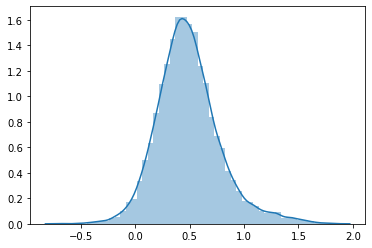

In [20]:
seaborn.distplot(coefs)

In [21]:
numpy.quantile(coefs, [.025, .975])

array([-0.02054357,  1.19751489])

In [22]:
1680/84

20.0

## 실험
* 실험과 설문: 실험 설계, 집단 간 비교, 효과 크기, 설문지 만들기
* MAB: 탐색과 활용의 교환, 머리 암드 밴딧, 추천시스템

### 상관 vs 안과
* 상관(correlation)  - 두 번수가 함께 움직이는 정도
* 상관 != 인과 (cuasation)

### 실험
* causation을 확인하기 위한 개입
* 조건(condition) - 실험자가 체계적으로 변화시키는 독립변수의 각 단계

### 외생변수
* 실험의 독립/종속 변수가 아닌 변수
* 혼입변수confounding variable) - 종속 변수에 영향을 미치는 외생 변수
* 일정 범위로 고정시키거나 통계적으로 통계

### 종속변수 (dependent variables) 고르기
* 실험의 목적을 고려
    ex) 고객 만족도는 중요한가? 고객만족도와 매출이 상관관계가 있는가?

### 매개변수 (Mediator) 사용
* 독립변수 -> 매개변수 -> 종속변수
    ex) Netflix에서의 고객 이탈률 vs 체류시간
    -> 체류시간을 늘리면 이탈하지 않는다
    
### Counterbalancing
* 조건들의 순서에 균형을 맞추는 것
    * 사람들 마다 순서를 바꿔야 함
    * 순서가 영향을 미치기 때문에
* 무작위
    ex) ABC ACB BAC ..
* 라틴스퀘어 (마방진): 순서 자체는 고정이나 무엇을 먼저할지만 바꿈

## 두 그룹의 수면 시간 차이

In [23]:
stat = sleep.groupby('group').mean() 

In [24]:
stat

,Unnamed: 0,extra,ID
group,,,
1,5.5,0.75,5.5
2,15.5,2.33,5.5


### 두 집단의 평균차이
* 같은 모집단에서 두 번 샘플링하면 약간 다른 샘플이 만들어짐
* 실험에서 각 조건들은 같은 모집단에서 샘플링된 것인가(=실제로는 같음), 아니면 다른 모집단에서 샘플링된 것인가(=실제로 다름)
* 우도의 논리: 같은 모집단에서 샘플링했을 때)가정_ 이런 차이가 관찰될 수 있을까?
* 계산하는 방법: 신뢰구간을 구한다

### Bootstrapping을 이용한 평균 차이 검증

#### 집단을 무시하고 데이터를 모두 섞는다 (동일한 모집단 대용)
* 관찰된 차이가 95* % 신뢰구간 안 쪽이라면, 같은 모집단 안에서도 나올 수 있는 차이
-> 같은 모집단이라고 친다
* 신뢰수준은 피요에 따라 조정한다

In [25]:
diff = stat.loc[2, 'extra'] - stat.loc[1, 'extra']

In [26]:
diff  # 2번 그룹 수면시간 평균 - 1번 그룹 수면시간 평균

1.5799999999999996

pandas에 loc과 iloc

- loc: 이름으로 위치를 지정
- iloc: ~번째로 위치를 지정

In [27]:
diffs = []
for _ in range(30000):
    s = resample(sleep['extra'])
    d = s.iloc[0:10].mean()  - s.iloc[10:20].mean()
    diffs.append(d)

In [28]:
numpy.quantile(diffs, [.025, .975])  # 95% 신뢰구간 = 신뢰수준 95% = 유의수준 5%

array([-1.74,  1.72])

In [29]:
numpy.quantile(diffs, [.005, .995])  # 99% 신뢰구간 = 유의수준 1%

array([-2.27005,  2.27   ])

In [30]:
import random

In [31]:
diffs = []
for _ in range(30000):
    s = list(sleep['extra'])
    random.shuffle(s)
    d = numpy.mean(s[0:10])  - numpy.mean(s[10:20])
    diffs.append(d)

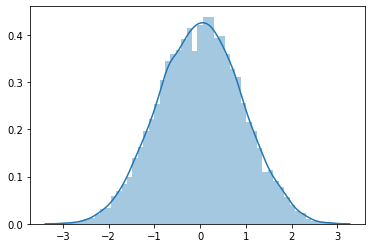

In [32]:
seaborn.distplot(diffs)

In [33]:
numpy.quantile(diffs, [.025, .975])

array([-1.76,  1.78])

In [34]:
numpy.quantile(diffs, .95)

1.5

In [35]:
diff

1.5799999999999996

### 오류의 종류

| 검증결과/실제 | 다름 | 같음 |
|-----|--------|------|
| 다름 | - | False Alarm 1종오류 |
| 같음 | Miss 2종 오류 | - |

### 신뢰수준 vs 유의수준
* 신뢰수준 = 100 % - 유의수준
* 신뢰수준 = 95 % 이면, 유의수준 = 5 %
* 유의수준 = 1종 오류의 확률
    
|신뢰수준 | 유의수준(1종 오류의 확률)|
|-------|---------|
| 100% | 0% |
| 95% | 5% |

* 1종 오류를 줄이면 2종 오류가 늘어나고
* 2종 오류를 줄이면 1종 오류가 늘어난다
    * 둘 다 줄이려면 샘플 크기를 키워야한다